In [1]:
import pandas as pd
file = "american_bankruptcy_dataset.csv"
df = pd.read_csv(file)
df.head()


,company_name,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
0,C_1,1999.0,alive,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,...,35.163,201026.000,128.348,1024333.000,372.7519,401483.0,1024333.000,935302.0,D,37
1,C_1,2000.0,alive,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,...,18531.000,204065.000,115187.000,874255.000,377.1180,361642.0,874255.000,809888.0,D,37
2,C_1,2001.0,alive,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,...,-58.939,139.603,77528.000,638721.000,364.5928,399964.0,638721.000,611514.0,D,37
3,C_1,2002.0,alive,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,...,-12.410,124106.000,66322.000,606337.000,143.3295,391633.0,606337.000,575592.0,D,37
4,C_1,2003.0,alive,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,...,3504.000,131884.000,104661.000,651.958,308.9071,407608.0,651.958,604467.0,D,37


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   fyear         78682 non-null  float64
 2   status_label  78682 non-null  object 
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [3]:
df.to_excel('raw_dataset.xlsx', index=False)

In [4]:
unique_values = df['company_name'].unique()
print(unique_values)
unique_values_count_company = len(df['company_name'].unique())
print("Number of unique values:", unique_values_count_company)

['C_1' 'C_2' 'C_3' ... 'C_8969' 'C_8970' 'C_8971']
Number of unique values: 8971


In [5]:
unique_values = sorted(df['status_label'].unique())

print("Unique values in status_label column:", unique_values)

Unique values in status_label column: ['alive', 'failed']


In [6]:
# First check if status_label has only one value for each company
unique_status_per_company = df.groupby('company_name')['status_label'].nunique()
# Filter out companies with only one unique value
companies_with_single_status = unique_status_per_company[unique_status_per_company == 1]
# Output the number of companies with only one unique value
print("Number of companies with single unique status label:", len(companies_with_single_status))


# Filter out the companies whose status_label column value is "failed" and count their number
failed_companies = df[df['status_label'] == 'failed']['company_name'].unique()
num_failed_companies = len(failed_companies)

print("\nNumber of companies with status_label 'failed':", num_failed_companies)

Number of companies with single unique status label: 8971

Number of companies with status_label 'failed': 609


In [7]:
#Check whether all years of each company are consecutive

In [8]:
# Group by company_name
grouped = df.groupby('company_name')

# Initialize counter
interrupted_companies = set()
uninterrupted_companies = set()

# Iterate through each group
for name, group in grouped:
    # Check if fyear is in order without breaks
    fyears = group['fyear'].tolist()
    ordered = all(fyears[i] == fyears[i+1] - 1 for i in range(len(fyears)-1))
    
    # Update counter
    if ordered:
        uninterrupted_companies.add(name)
    else:
        interrupted_companies.add(name)

# Output results
print(f"Number of company_names with breaks：{len(interrupted_companies)}")
print(f"Number of company_names without breaks：{len(uninterrupted_companies)}")


Number of company_names with breaks：710
Number of company_names without breaks：8261


In [9]:
#Check how many unique companies in consecutive years there are in failed

In [10]:
# Group by company_name
grouped = df.groupby('company_name')

# Initialize counter
failed_group_count = 0
alive_group_count = 0

# Iterate through each group
for name, group in grouped:
    # Check if fyear is in order without breaks
    fyears = group['fyear'].tolist()
    ordered = all(fyears[i] == fyears[i+1] - 1 for i in range(len(fyears)-1))
    
    # If it is discontinuous company_name
    if not ordered:
        # Group by status_label
        status_groups = group.groupby('status_label')
        
        # If there is a failed group, increment the counter
        if 'failed' in status_groups.groups:
            failed_group_count += 1
        
        # If there is an alive group, increase the counter
        if 'alive' in status_groups.groups:
            alive_group_count += 1

# Output results
print("In the company_name with breaks, after grouping by status_label, the number of failed groups：", failed_group_count)
print("In the company_name with breaks, after grouping by status_label, the number of alive groups：", alive_group_count)


In the company_name with breaks, after grouping by status_label, the number of failed groups： 48
In the company_name with breaks, after grouping by status_label, the number of alive groups： 662


In [11]:
#For a unique company, what percentage failed

percent_failed_company = num_failed_companies/unique_values_count_company
print(percent_failed_company)
percent_alive_company = 1 - percent_failed_company
print(percent_alive_company)



0.06788540853862446
0.9321145914613755


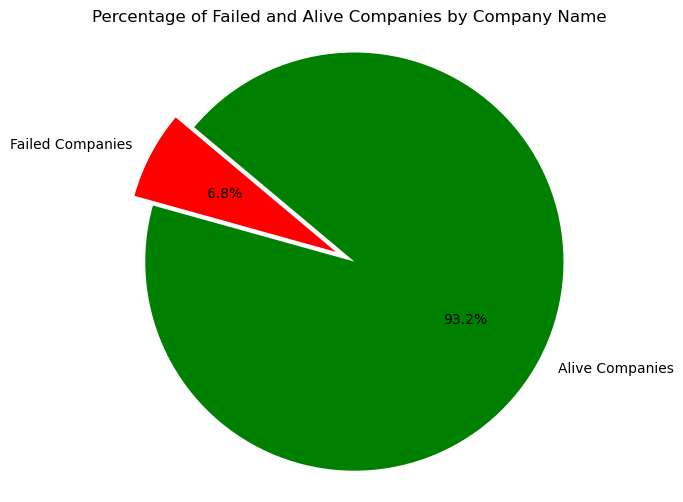

In [12]:
import matplotlib.pyplot as plt

# Pie chart data
sizes = [percent_failed_company, percent_alive_company]
labels = ['Failed Companies', 'Alive Companies']
colors = ['red', 'green']
explode = (0.1, 0)  # Highlight the failed company part

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Failed and Alive Companies by Company Name')
plt.axis('equal')  # Keep aspect ratios equal
plt.show()


In [13]:
#Not by unique company, but by all sample rows. 
#For the overall data set, the proportion of records with the status label 'failed' in the data frame to the total number of records.
failed_proportion = df['status_label'].value_counts(normalize=True)['failed']
print("Proportion of 'failed' occurrences:", failed_proportion)

alive_proportion = df['status_label'].value_counts(normalize=True)['alive']
print("Proportion of 'alive' occurrences:", alive_proportion)

Proportion of 'failed' occurrences: 0.06634300094049465
Proportion of 'alive' occurrences: 0.9336569990595054


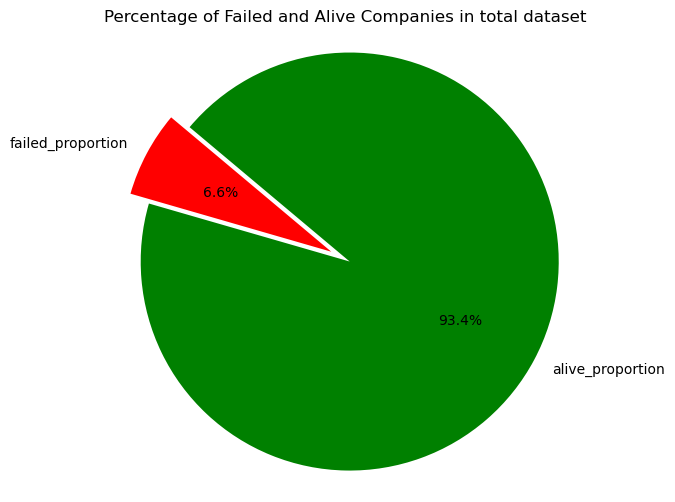

In [14]:

# Pie chart data
sizes = [failed_proportion, alive_proportion]
labels = ['failed_proportion', 'alive_proportion']
colors = ['red', 'green']
explode = (0.1, 0)  

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Failed and Alive Companies in total dataset')
plt.axis('equal')  
plt.show()

In [15]:

# Group by year and company name, and count the number and proportion of failures in each group
grouped = df.groupby(['fyear', 'company_name']).agg(
    failed_count=('status_label', lambda x: (x == 'failed').sum())
)

# Reset index for easier analysis
grouped.reset_index(inplace=True)

# Group by year and count the number of failed companies and the total number of companies in each year
yearly_stats = grouped.groupby('fyear').agg(
    total_companies=('company_name', 'nunique'),
    total_failed=('failed_count', lambda x: (x > 0).sum())
)



# Calculate the proportion of failed companies
yearly_stats['failed_ratio'] = yearly_stats['total_failed'] / yearly_stats['total_companies']

# Show results
print(yearly_stats)


        total_companies  total_failed  failed_ratio
fyear                                              
1999.0             5308           380      0.071590
2000.0             5226           404      0.077306
2001.0             4897           414      0.084542
2002.0             4651           414      0.089013
2003.0             4417           415      0.093955
2004.0             4348           404      0.092916
2005.0             4205           379      0.090131
2006.0             4128           366      0.088663
2007.0             4009           336      0.083811
2008.0             3857           284      0.073632
2009.0             3743           234      0.062517
2010.0             3625           218      0.060138
2011.0             3513           194      0.055223
2012.0             3485           182      0.052224
2013.0             3484           167      0.047933
2014.0             3504           142      0.040525
2015.0             3354           111      0.033095
2016.0      

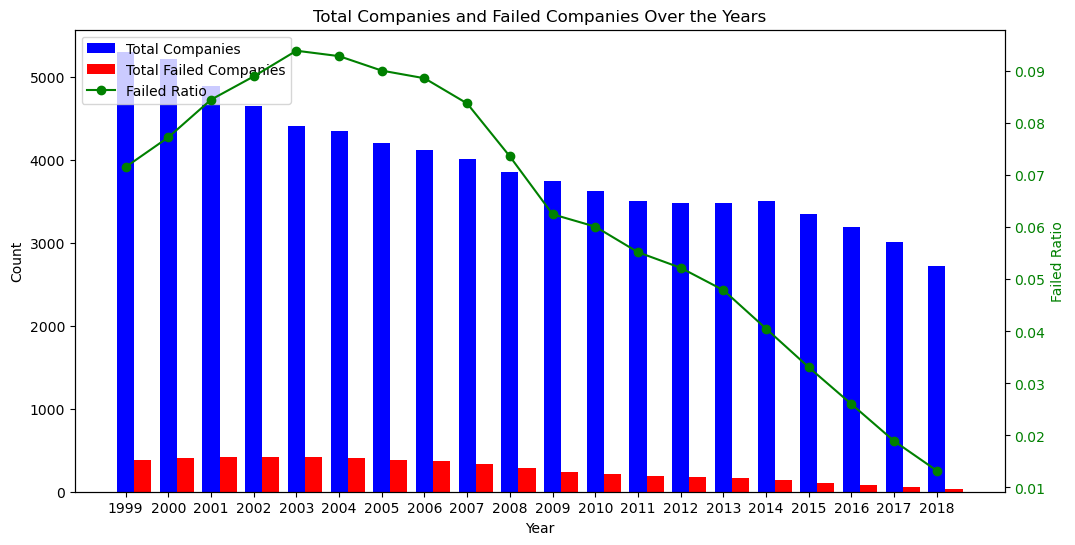

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create charts and subcharts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Draw a bar chart - total number of companies and number of failed companies
ax1.bar(yearly_stats.index, yearly_stats['total_companies'], color='blue', label='Total Companies', width=0.4)
ax1.bar(yearly_stats.index + 0.4, yearly_stats['total_failed'], color='red', label='Total Failed Companies', width=0.4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Total Companies and Failed Companies Over the Years')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Line Chart - Failure Ratio
ax2.plot(yearly_stats.index, yearly_stats['failed_ratio'], color='green', marker='o', label='Failed Ratio')
ax2.set_ylabel('Failed Ratio', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Set the abscissa interval
ax1.set_xticks(np.arange(min(yearly_stats.index), max(yearly_stats.index)+1, 1))

# Show chart
plt.show()


In [17]:
#The longest duration period in the data set is 20 years. Let’s look at the distribution of the number of years included in different companies in alive and failed.
#Group by company name
grouped = df.groupby('company_name')

# Initialize the dictionary to store results
result = {'failed': {}, 'alive': {}}

# Traverse each group and count how many years of data each company has
for company, group in grouped:
    years = group['fyear'].nunique()  # Count the number of unique years
    status_counts = group['status_label'].value_counts()
    if 'failed' in status_counts:
        failed_count = status_counts['failed']
    else:
        failed_count = 0
    if 'alive' in status_counts:
        alive_count = status_counts['alive']
    else:
        alive_count = 0
    # Store the results into the corresponding dictionary
    if failed_count > 0:
        if failed_count not in result['failed']:
            result['failed'][failed_count] = 1
        else:
            result['failed'][failed_count] += 1
    if alive_count > 0:
        if alive_count not in result['alive']:
            result['alive'][alive_count] = 1
        else:
            result['alive'][alive_count] += 1

# Show results
print("Failed years distribution:", result['failed'])
print("Alive years distribution:", result['alive'])


Failed years distribution: {6: 75, 13: 16, 5: 52, 3: 36, 10: 42, 19: 15, 7: 55, 17: 9, 20: 13, 8: 57, 9: 62, 15: 15, 16: 14, 1: 10, 12: 32, 18: 10, 2: 22, 14: 16, 4: 36, 11: 22}
Alive years distribution: {19: 227, 20: 1159, 15: 171, 9: 340, 13: 224, 7: 442, 5: 564, 18: 148, 10: 223, 14: 178, 3: 720, 12: 263, 16: 154, 2: 884, 11: 268, 4: 645, 6: 498, 1: 745, 8: 370, 17: 139}


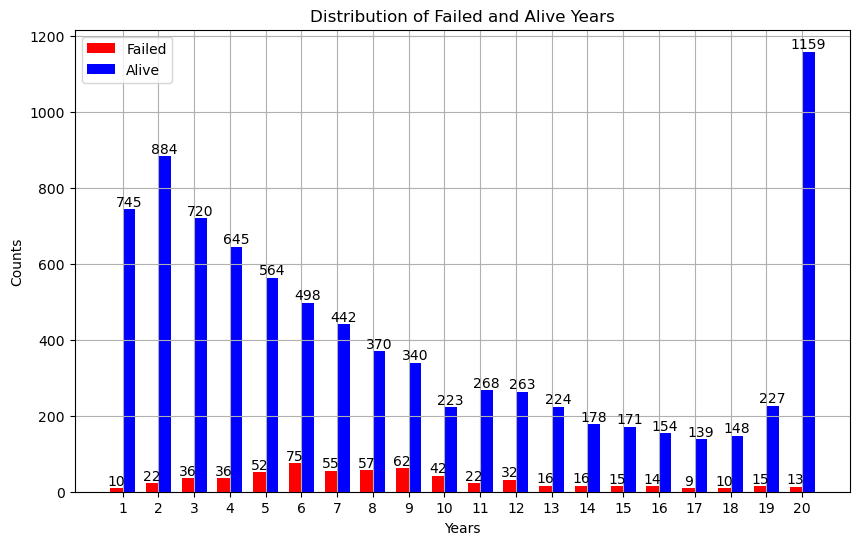

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the results to a data format suitable for plotting a histogram
failed_years = sorted(list(result['failed'].keys()))
failed_counts = [result['failed'][year] for year in failed_years]

alive_years = sorted(list(result['alive'].keys()))
alive_counts = [result['alive'][year] for year in alive_years]

# Draw a stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(failed_years))
bars_failed = plt.bar(index, failed_counts, bar_width, color='red', label='Failed')
bars_alive = plt.bar(index + bar_width, alive_counts, bar_width, color='blue', label='Alive')

# Add numerical labels above each bar
for i in range(len(failed_years)):
    plt.text(bars_failed[i].get_x() + bars_failed[i].get_width() / 2, bars_failed[i].get_height(),
             failed_counts[i], ha='center', va='bottom')
    plt.text(bars_alive[i].get_x() + bars_alive[i].get_width() / 2, bars_alive[i].get_height(),
             alive_counts[i], ha='center', va='bottom')

plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Distribution of Failed and Alive Years')
plt.xticks(index + bar_width / 2, failed_years)
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Outliers

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


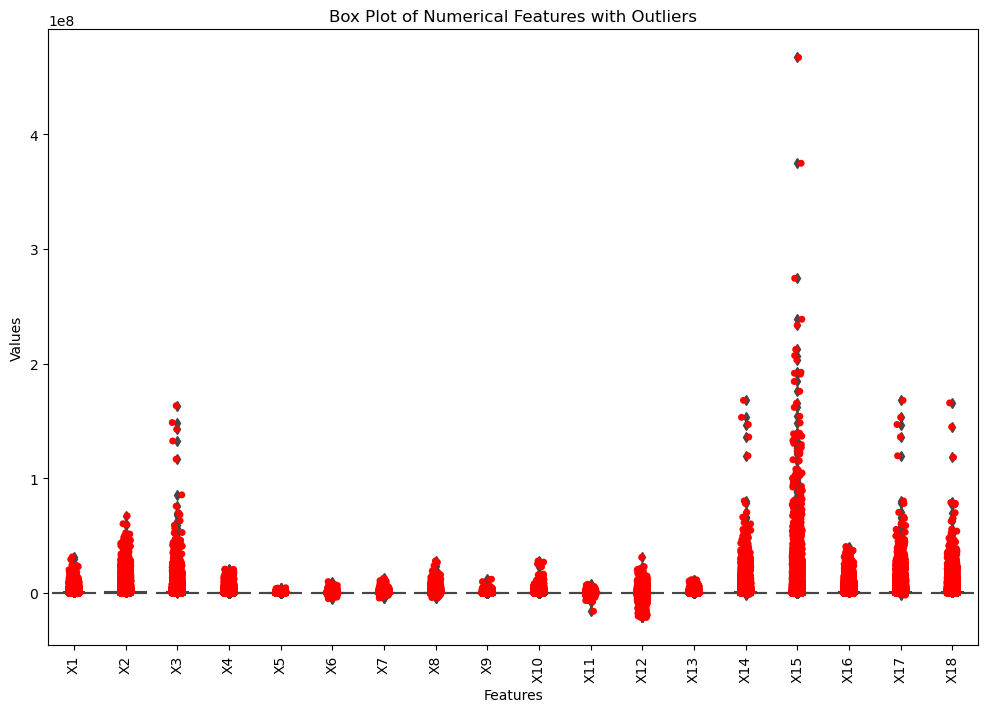

In [20]:
# Draw box plot
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])

# Plot data points using stripplot()
sns.stripplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']], color='red', size=5)
#Plot data points on a boxplot using the stripplot() function of the Seaborn library. This function is used to mark outliers. You passed the same DataFrame column as the data and set the color of the data points to red and the size to 5.

plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()
#Normal values are not specifically labeled and therefore do not appear as special colors or shapes in the plot.

In [21]:
#Correlation coefficient matrix
#The columns processed by the correlation coefficient matrix must contain numerical data, because the correlation coefficient is a statistic that measures the relationship between two numerical variables. If some columns are not of numeric type, they are ignored when calculating the correlation coefficient matrix.

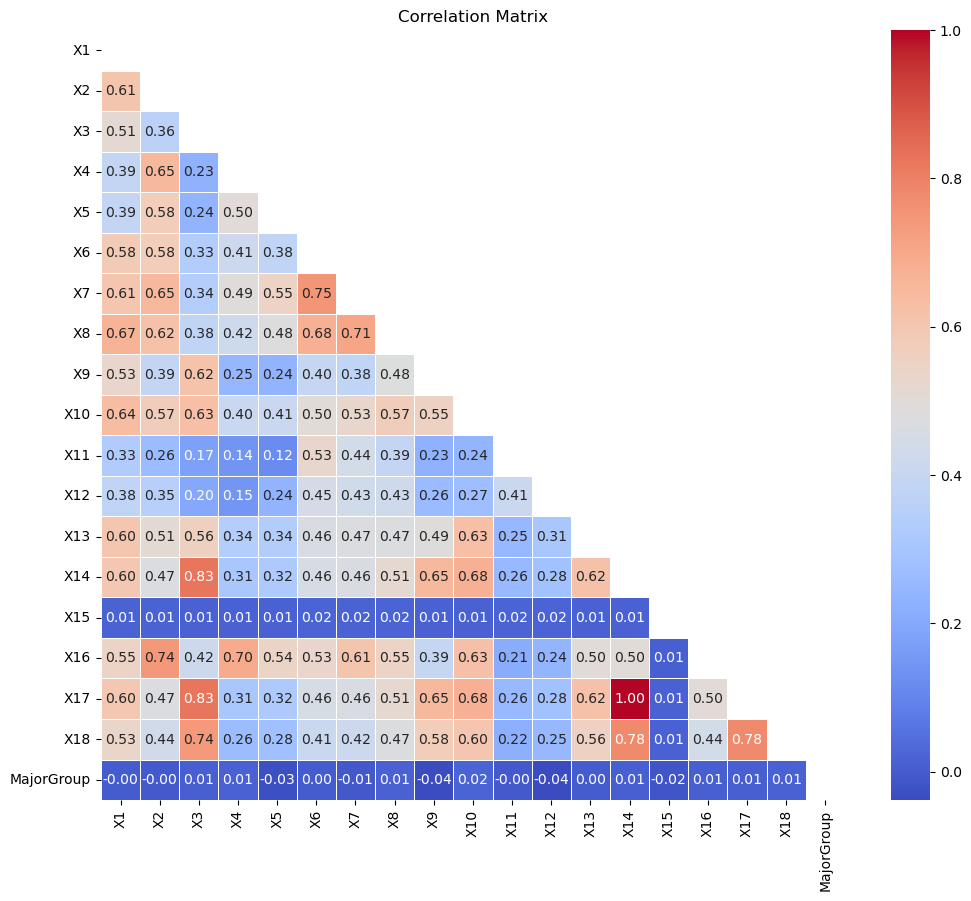

In [22]:
#Add the required columns to the data
variables = ['status_label', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'Division', 'MajorGroup']
data = df[variables]

# Calculate correlation coefficient matrix
correlation_matrix = data.corr()

# Create a mask to hide the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()



In [23]:
#First check the unique values, then merge each company into one column, and fill in the missing values where there is no data

In [24]:
import pandas as pd


# Verify whether the status_label under each company name is unique
unique_status_label_per_company = df.groupby('company_name')['status_label'].nunique() == 1
# Calculates the sum of quantities with only one value
total_unique_status_label = unique_status_label_per_company.sum()
print("total number of unique values for status_label:", total_unique_status_label)

# Verify whether the division under each company name is unique
unique_division_per_company = df.groupby('company_name')['Division'].nunique() == 1
# Calculates the sum of quantities with only one value
total_unique_division = unique_division_per_company.sum()
print("total number of unique values for division:", total_unique_division)

# Verify whether the majorgroup under each company name is unique
unique_majorgroup_per_company = df.groupby('company_name')['MajorGroup'].nunique() == 1
# Calculates the sum of quantities with only one value
total_unique_majorgroup = unique_majorgroup_per_company.sum()
print("total number of unique values for majorgroup:", total_unique_majorgroup)




total number of unique values for status_label: 8971
total number of unique values for division: 8971
total number of unique values for majorgroup: 8971


In [25]:
import pandas as pd
import numpy as np
import warnings

# Ignore warning
warnings.filterwarnings('ignore')


# Create a list of all company names
all_companies = df['company_name'].unique()

# Create an empty DataFrame to store the final results
new_df_columns = ['company_name'] + [f'X{i}_{year}' for year in range(1999, 2019) for i in range(1, 19)] + ['status_label', 'Division', 'MajorGroup']
new_df = pd.DataFrame(columns=new_df_columns)

# Iterate through each company
for company in all_companies:
    # Create a new row for this company
    new_row = {'company_name': company}
    
    # Traverse from 1999 to 2018
    for year in range(1999, 2019):
        # Check if the company has data for that year
        company_data = df[(df['company_name'] == company) & (df['fyear'] == year)]
        if not company_data.empty:  # Check if data is found
            # If there is data, add accounting data to a new row
            for i in range(1, 19):
                column_name = f'X{i}_{year}'
                if f'X{i}' in company_data:  # Check whether there is a corresponding accounting data column
                    new_row[column_name] = company_data[f'X{i}'].iloc[0]
                else:
                    new_row[column_name] = np.nan
        else:
            # If there is no data, add missing values to a new row
            for i in range(1, 19):
                column_name = f'X{i}_{year}'
                new_row[column_name] = np.nan
    
    # Add unique values of status_label, Division, MajorGroup
    company_info = df[df['company_name'] == company].iloc[0]
    new_row['status_label'] = company_info['status_label']
    new_row['Division'] = company_info['Division']
    new_row['MajorGroup'] = company_info['MajorGroup']
    
    
    # Add new rows to a new DataFrame
    new_df = new_df.append(new_row, ignore_index=True)

# Display the first 5 rows of the new DataFrame
print(new_df.head())


  company_name    X1_1999     X2_1999     X3_1999   X4_1999    X5_1999  \
0          C_1   511267.0   740998.00  833107.000  180447.0  18373.000   
1          C_2  1029438.0  1672529.00  930142.000   11024.0    102.090   
2          C_3     9757.0    13986.00   19796.000    5974.0    667.000   
3          C_4   381872.0  1160266.00     366.683  591784.0     25.633   
4          C_5    28957.0       42.21   79567.000     591.0   2024.000   

    X6_1999    X7_1999    X8_1999     X9_1999  ...  X12_2018  X13_2018  \
0   70658.0   89031.00  191226.00     336.018  ...       NaN       NaN   
1  311649.0  413739.00  996805.00  243882.000  ...       NaN       NaN   
2    -932.0    -265.00    9574.00    5494.000  ...       NaN       NaN   
3   97527.0     123.16     365.76  161033.000  ...       NaN       NaN   
4    1849.0    3873.00   27743.00   10947.000  ...       NaN       NaN   

   X14_2018  X15_2018  X16_2018  X17_2018  X18_2018  status_label  Division  \
0       NaN       NaN       NaN

In [26]:
new_df.shape

(8971, 364)

In [27]:
# Find the last year with data and add a column last_year

# Create an empty list to store the last year for which each company has data
last_years = []

# Iterate through each company
for company in all_companies:
    # Get current company data
    company_data = df[df['company_name'] == company]
    # Get the last year with data for the current company
    last_year = company_data['fyear'].max()
    # Add final year to list
    last_years.append(last_year)

# Add the last year with data as a new column
new_df['last_year'] = last_years

# Display the first 5 rows of the new DataFrame, including the new last_year column
print(new_df.head(5))

  company_name    X1_1999     X2_1999     X3_1999   X4_1999    X5_1999  \
0          C_1   511267.0   740998.00  833107.000  180447.0  18373.000   
1          C_2  1029438.0  1672529.00  930142.000   11024.0    102.090   
2          C_3     9757.0    13986.00   19796.000    5974.0    667.000   
3          C_4   381872.0  1160266.00     366.683  591784.0     25.633   
4          C_5    28957.0       42.21   79567.000     591.0   2024.000   

    X6_1999    X7_1999    X8_1999     X9_1999  ...  X13_2018  X14_2018  \
0   70658.0   89031.00  191226.00     336.018  ...       NaN       NaN   
1  311649.0  413739.00  996805.00  243882.000  ...       NaN       NaN   
2    -932.0    -265.00    9574.00    5494.000  ...       NaN       NaN   
3   97527.0     123.16     365.76  161033.000  ...       NaN       NaN   
4    1849.0    3873.00   27743.00   10947.000  ...       NaN       NaN   

   X15_2018  X16_2018  X17_2018  X18_2018  status_label  Division  MajorGroup  \
0       NaN       NaN       N

In [28]:
#stored as a new dataset
new_df.to_csv('new_american_bankruptcy_dataset.csv', index=False)


In [29]:
new_df.to_excel('dataset_bycompany_withnull.xlsx', index=False)

